In [1]:
import utils.helper
import importlib
importlib.reload(utils.helper)  # reload updated module
from utils.helper import *
sns.set_theme()

import ipywidgets as widgets
from IPython.display import display, clear_output

import seaborn as sns
import matplotlib.pyplot as plt

## Figure 2: Impact of Temperature Parameter
>  Temperature
parameter of zero (in blue) has the least variance across
different LLMs. This allows reducing variance and reliably
measuring privacy biases.

Object loaded from dataframes/pivot_prompt_df_without_NA_temp_run.pkl.lzma
Temperatures: ['t0', 't05', 't1']


/tmp/ipykernel_3408/3785241068.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipykernel_3408/3785241068.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipykernel_3408/3785241068.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipykernel_3408/3785241068.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipykernel_3408/3785241068.py:49: Future

<Figure size 4000x3000 with 0 Axes>

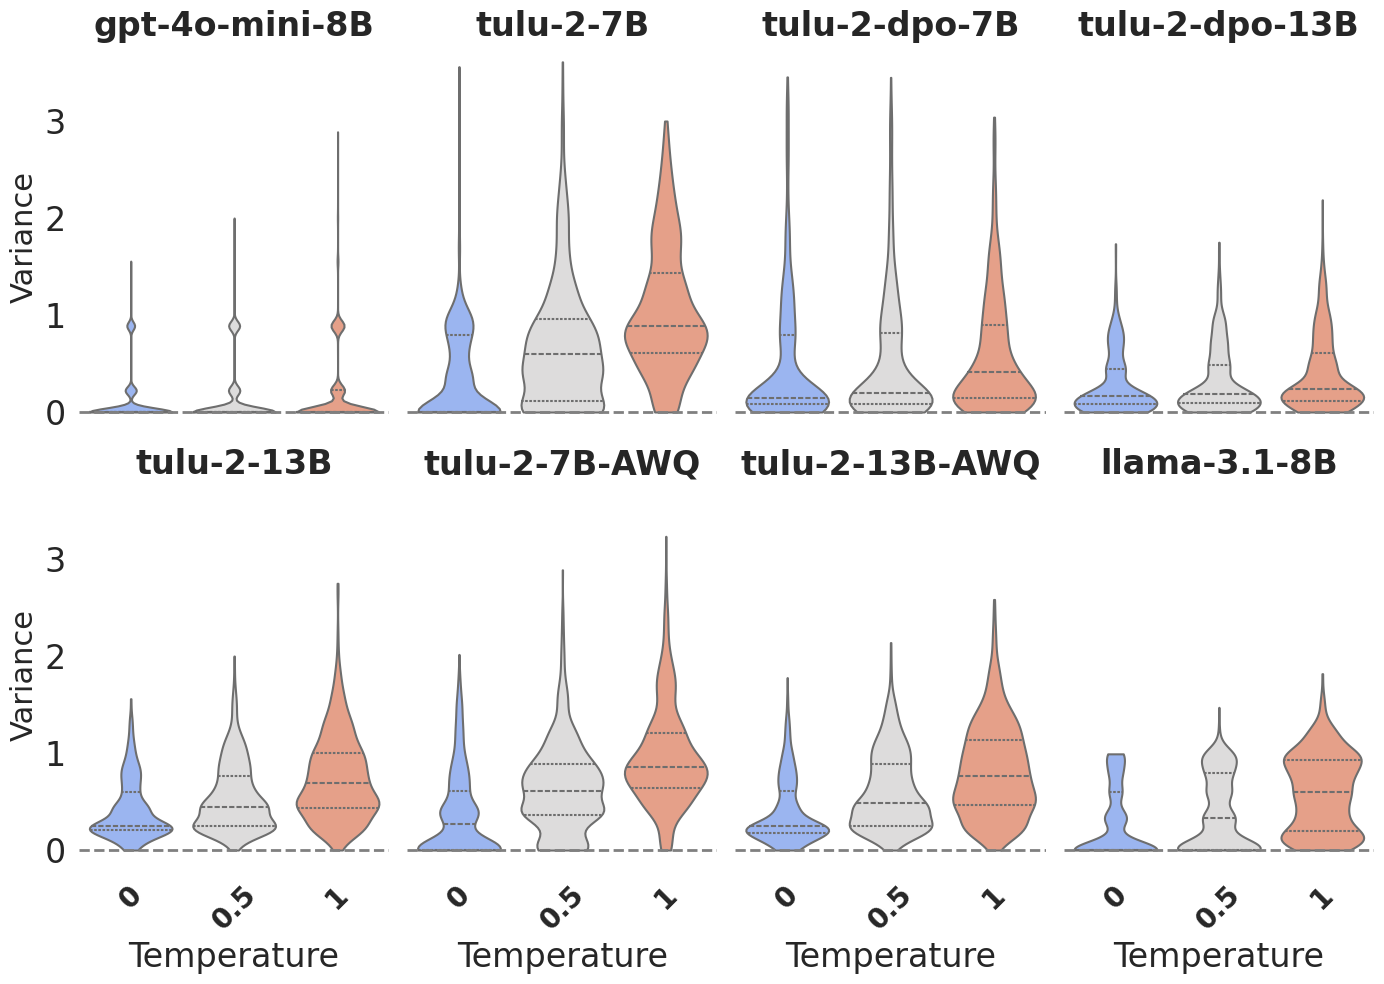

In [2]:

pivot_prompt_df= load_object("dataframes/pivot_prompt_df_without_NA_temp_run.pkl.lzma")

# ============================================================
# 1. MODEL ORDER (controls FacetGrid column order)
# ============================================================

model_order = [
    'gpt-4o-mini-8B',
    'tulu-2-7b',
    'tulu-2-dpo-7b',
    'tulu-2-dpo-13b',
    'tulu-2-13b',
    'tulu-2-7B-AWQ',
    'tulu-2-13B-AWQ',
    'Meta-Llama-3.1-8B-Instruct'
]

# ============================================================
# 2. TEMPERATURE COLOR PALETTE
# ============================================================

unique_temps = sorted(pivot_prompt_df['temperature'].unique())
temp_palette = sns.color_palette("coolwarm", len(unique_temps))
temp_palette_dict = dict(zip(unique_temps, temp_palette))

print("Temperatures:", unique_temps)

# ============================================================
# 3. FACETGRID SETUP (one column per model)
# ============================================================

plt.figure(figsize=(40, 30))

g = sns.FacetGrid(
    pivot_prompt_df, 
    col='model', 
    height=5, 
    aspect=0.7, 
    col_wrap=4, 
    col_order=model_order
)

# ============================================================
# 4. FUNCTION TO DRAW VIOLIN PLOTS IN EACH FACET
# ============================================================

def color_violinplot(data, **kwargs):
    """Draw a violin plot colored by temperature."""
    sns.violinplot(
    y='variance', 
    data=data, 
    x='temperature', 
    #width=0.5,  # Increased width for better clarity
    palette="coolwarm",  # You could use a distinct palette if temp_palette_dict isn't optimal
    inner="quart",  # Option to add more structure to the distribution visualization
    linewidth=1.5,  # Optional for improving edge visibility
    cut= 0,
    **kwargs
)


# Map to grid
g.map_dataframe(color_violinplot)

# ============================================================
# 5. AXIS LABELS, TITLES, AND STYLING
# ============================================================

g.set_xlabels('Temperature', fontsize=24)
g.set_ylabels('Variance', fontsize=22)

# Title normalization dictionary
title_fix = {
    'tulu-2-13b': 'tulu-2-13B',
    'tulu-2-7b': 'tulu-2-7B',
    'tulu-2-dpo-7b': 'tulu-2-dpo-7B',
    'tulu-2-dpo-13b': 'tulu-2-dpo-13B',
    'Meta-Llama-3.1-8B-Instruct': 'llama-3.1-8B'
}

for ax in g.axes.flat:
    
    # --------------------------------------------------------
    # Fix title formatting
    # --------------------------------------------------------
    title = ax.get_title().replace('model = ', '')
    title = title_fix.get(title, title)  # Apply mapping
    ax.set_title(title, fontsize=24, fontweight='bold')

    # --------------------------------------------------------
    # Remove axes frame (no border/spines)
    # --------------------------------------------------------
    for spine in ax.spines.values():
        spine.set_visible(False)

    # --------------------------------------------------------
    # Baseline + grid + background
    # --------------------------------------------------------
    ax.axhline(0, color='gray', linestyle='--', linewidth=2)
    ax.grid(True, linestyle='-', linewidth=0.5, alpha=0.7)
    ax.set_facecolor('white')

    # --------------------------------------------------------
    # Tick styling
    # --------------------------------------------------------
    ax.tick_params(axis='both', labelsize=24)

    # X-tick rotation + replace tick labels with cleaner ones
    ax.set_xticklabels(['0', '0.5', '1'], rotation=45, fontsize=20, fontweight='bold')

# ============================================================
# 6. FINAL LAYOUT & DISPLAY
# ============================================================

plt.tight_layout()
plt.show()


## Figure 3: Distribution of Responses

>Responses across LLMs
and prompt variations before filtering with thresholds.

Object loaded from dataframes/pivot_prompt_df_with_NA_regular_run.pkl.lzma
['Meta-Llama-3.1-8B-Instruct', 'gpt-4o-mini-8B', 'tulu-2-13B-AWQ', 'tulu-2-13b', 'tulu-2-7B-AWQ', 'tulu-2-7b', 'tulu-2-dpo-13b', 'tulu-2-dpo-7b']


/tmp/ipykernel_3408/3391367042.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ytick_labels)
/tmp/ipykernel_3408/3391367042.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ytick_labels)
/tmp/ipykernel_3408/3391367042.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ytick_labels)
/tmp/ipykernel_3408/3391367042.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ytick_labels)
/tmp/ipykernel_3408/3391367042.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ytick_lab

['strongly acceptable', 'somewhat acceptable', 'neutral', 'somewhat unacceptable', 'strongly unacceptable', 'No Answer']


/tmp/ipykernel_3408/3391367042.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ytick_labels)


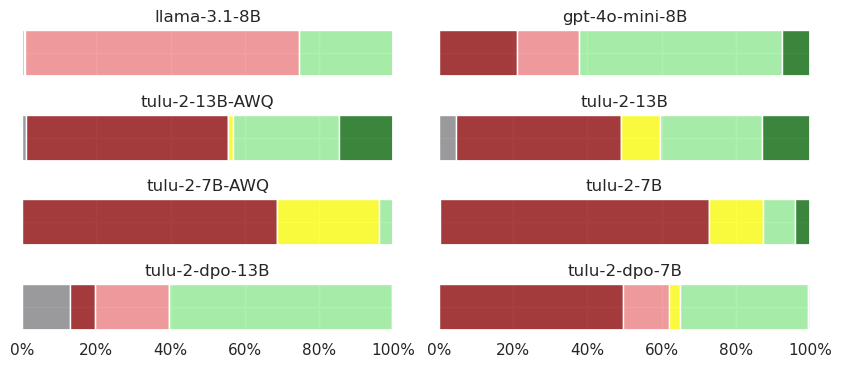

In [3]:
sns.set_theme()

# ============================================================
# for distribution all answers across models and use
# ============================================================
#all_models_df= load_object("dataframes/all_models_df_with_NA_answers_scores_regular_run.pkl.lzma")


# ============================================================
# or distribution of plularity uncomment and use
# ============================================================
pivot_prompt_df= load_object("dataframes/pivot_prompt_df_with_NA_regular_run.pkl.lzma")

# Use the new dataframe
fig_df = pivot_prompt_df   #all_models_df # 

# Filter out rows where 'dataset' is 'iot'
fig_df = fig_df[fig_df['dataset'] == 'iot']


# Map the 'score' column to the 'value' category based on a threshold or categorization logic
#fig_df['value'] = fig_df['score'].fillna(-100).apply(lambda x: values.get(x, 'No Answer'))


orders = [
    "No Answer",
    "strongly unacceptable",
    "somewhat unacceptable",
    "neutral",
    "somewhat acceptable",
    "strongly acceptable"
]

# Mapping from numeric codes to label strings
values = {
    -100: 'No Answer',
    -2: 'strongly unacceptable',
    -1: 'somewhat unacceptable',
     0: 'neutral',
     1: 'somewhat acceptable',
     2: 'strongly acceptable'
}

# Custom color palette for categories
palette = {
    'No Answer': 'gray',
    'strongly unacceptable': 'darkred',
    'somewhat unacceptable': 'lightcoral',
    'neutral': 'yellow',
    'somewhat acceptable': 'lightgreen',
    'strongly acceptable': 'darkgreen'
}


# Ensure 'value' is treated as a categorical variable
fig_df['value'] = fig_df['value'].astype('category')

# Clean ticks function for y-axis
def clean_ticks(ax):
    """Remove 'iot' artifacts from y-tick labels."""
    ytick_labels = [label.get_text().replace("iot", "").strip() for label in ax.get_yticklabels()]
    ax.set_yticklabels(ytick_labels)

# Function to draw each subplot
def draw_subplot(ax, model):
    """Draw a filled histogram subplot for a given model's score distribution."""
    subset = fig_df.query('model == @model and not @pd.isna(value)')

    plot = sns.histplot(
        data=subset,
        stat="percent",
        multiple="fill",
        y="dataset",
        hue="value",
        palette=palette,
        hue_order=orders[::-1],
        ax=ax
    )
    



    plot.set_xlabel("")
    plot.set_ylabel("")

    # Format model name for display
    pretty_model = model.replace('Meta-Llama-3.1-8B-Instruct', 'llama-3.1-8B')
    pretty_model = (pretty_model.replace("7b", "7B")
                            .replace("8b", "8B")
                            .replace("13b", "13B")
                            .replace("awq", "AWQ"))

    ax.set_title(pretty_model, fontsize=24)

    tick_vals = ['0', '20', '40', '60', '80', '100']
    tick_positions = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]  # Explicitly set tick positions

    
    ax.set_xticks(tick_positions)  # Set positions for x-ticks
    ax.set_xticklabels([f"{x}%" for x in tick_vals])  # Set corresponding labels

    clean_ticks(ax)

# Filter out excluded models
exclude = ['gemini-gpt-4o-mini-8B']
unique_models = [m for m in fig_df['model'].unique() if m not in exclude]
print(unique_models)

# Determine grid layout
n_models = len(unique_models)
ncols = min(n_models, 2)
nrows = int(np.ceil(n_models / ncols))

# Create subplot grid
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(10, 4))
axes = np.array(axes).reshape(-1)

# Draw each model subplot
for i, model in enumerate(unique_models):
    try:
        draw_subplot(axes[i], model)
    except Exception as e:
        print("-->", model, e)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Extract legend handles/labels from one subplot
legend_handles = []
legend_labels = []

ax = axes.flatten()[1]
legend = ax.get_legend()
if legend:
    labels = [t.get_text() for t in legend.get_texts()]
    handles = legend.get_lines() + legend.get_patches()
    legend_handles.extend(handles)
    legend_labels.extend(labels)


# Remove legends from all axes
for ax in axes.flatten():
    if ax.get_legend():
        ax.get_legend().remove()

print(legend_labels)

# Capitalize labels for optional external legend
capitalized_labels = [lbl.capitalize() for lbl in legend_labels]

# Clean subplot titles and y-labels
for ax in axes.flatten():
    ax.set_title(ax.get_title().replace("Model: ", ""))
    ax.set_ylabel("")

# Layout adjustments
plt.tight_layout(pad=1.2)
plt.subplots_adjust(right=0.82, bottom=0.15)

plt.show()


## Figure 4: Prompt Sensitivity with Paraphrasing. 

> Paraphrasing
prompts results in significant variation in LLM responses
suggesting that LLMs suffer from prompt sensitivity. All
three paraphrasers have similar variance across all LLMs.

Object loaded from dataframes/pivot_prompt_df_without_NA_para_run.pkl.lzma
Detected variant families: ['Gemini' 'ChatGPT' 'Pegasus']
Base models: ['llama-3.1-8B' '4o-mini-8B' 'tulu-2-13B-AWQ' 'tulu-2-13B' 'tulu-2-7B-AWQ'
 'tulu-2-7B' 'tulu-2-DPO-13B' 'tulu-2-DPO-7B']


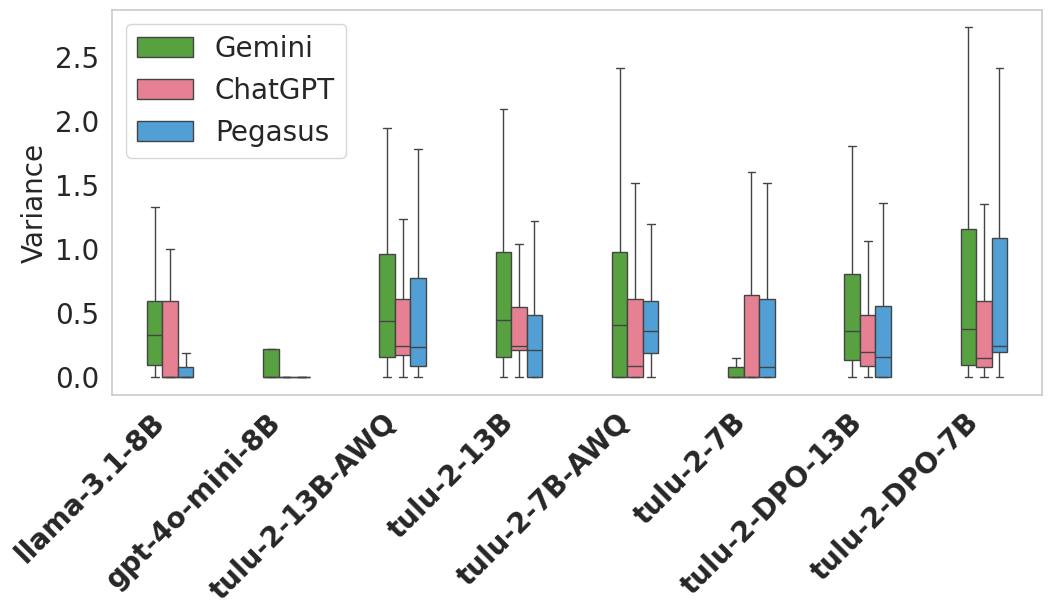

In [4]:
df = load_object("dataframes/pivot_prompt_df_without_NA_para_run.pkl.lzma")
import re
#print(df['model'].unique())
# --- Step 1: Extract variant and base model from model names ---
def extract_variant_and_base(model_name):
    """
    Identify variant family (prefix) and clean base model name.
    Example:
      'gemini-tulu-2-dpo-7b' -> ('Gemini', 'tulu-2-dpo-7b')
      'pegasus-tulu-2-13B-AWQ' -> ('Pegasus', 'tulu-2-13B-AWQ')
      'tulu-2-7b' -> ('Base', 'tulu-2-7b')
    """
    match = re.match(r'^(gemini|pegasus)-(.+)', model_name, re.IGNORECASE)
    if match:
        variant = match.group(1).capitalize()
        base = match.group(2)  
    else:
        variant = 'ChatGPT'
        base = model_name

    # Normalize some known model names for grouping
    #print(model_name, "---",variant)
    base = base.replace("gpt-","").replace('Meta-Llama-3.1-8B-Instruct', 'llama-3.1-8B')
    #base = base.replace("gpt-","").replace('gpt-4o-mini-8B', 'GPT-4o-mini-8B')
    base = base.replace("gpt-","").replace('tulu-2-13B-AWQ', 'tulu-2-13B-AWQ')
    base = base.replace("gpt-","").replace('tulu-2-7B-AWQ', 'tulu-2-7B-AWQ')
    base = base.replace('tulu-2-7b', 'tulu-2-7B')
    base = base.replace('tulu-2-dpo-7b', 'tulu-2-DPO-7B')
    base = base.replace('tulu-2-13b', 'tulu-2-13B')
    base = base.replace('tulu-2-dpo-13b', 'tulu-2-DPO-13B')
    #print(variant, base)
    return variant, base

df[['variant', 'base_model']] = df['model'].apply(lambda x: pd.Series(extract_variant_and_base(x)))

# --- Step 2: Define a consistent color palette for variants ---
unique_variants = df['variant'].unique()

variant_order = ['ChatGPT', 'Gemini', 'Pegasus']

palette = sns.color_palette("husl", len(variant_order))
variant_palette = dict(zip(variant_order, palette))

print("Detected variant families:", unique_variants)
print("Base models:", df['base_model'].unique())

# --- Step 3: Plot grouped boxplots ---
plt.figure(figsize=(12, 5))
sns.set_style("whitegrid", {'axes.facecolor': 'white'})
sns.boxplot(
    data=df,
    x='base_model',
    y='variance',
    hue='variant',
    palette=variant_palette,
    width=0.4,
    dodge=True,
    showfliers=False  #  hides the outliers
)


ax = plt.gca()

# Get current xtick labels
labels = [tick.get_text() for tick in ax.get_xticklabels()]

# Replace in-place
labels = [lbl.replace('4o-mini-8B', 'gpt-4o-mini-8B') for lbl in labels]

# Apply updated labels
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45, ha='right', fontsize=20, fontweight='bold')
# --- Step 4: Style ---
#plt.title('Variance between paraphrasing', fontsize=14, fontweight='bold')
plt.ylabel('Variance', fontsize=20)
plt.xlabel("")#('Base Model', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=20, fontweight='bold')
plt.yticks(fontsize=20)
plt.legend(title='', title_fontsize=12, fontsize=20)
plt.grid(False)
#plt.tight_layout()
plt.show()



## Figure 5: Prompt Sensitivity by re-ordering Likert scale.

> LLMs show significant variance due to prompt variation,
with three random Likert scale orders per prompt.

Object loaded from dataframes/pivot_prompt_df_without_NA_regular_run.pkl.lzma


/tmp/ipykernel_3408/2056591642.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(labels, fontsize=18, fontweight='bold')


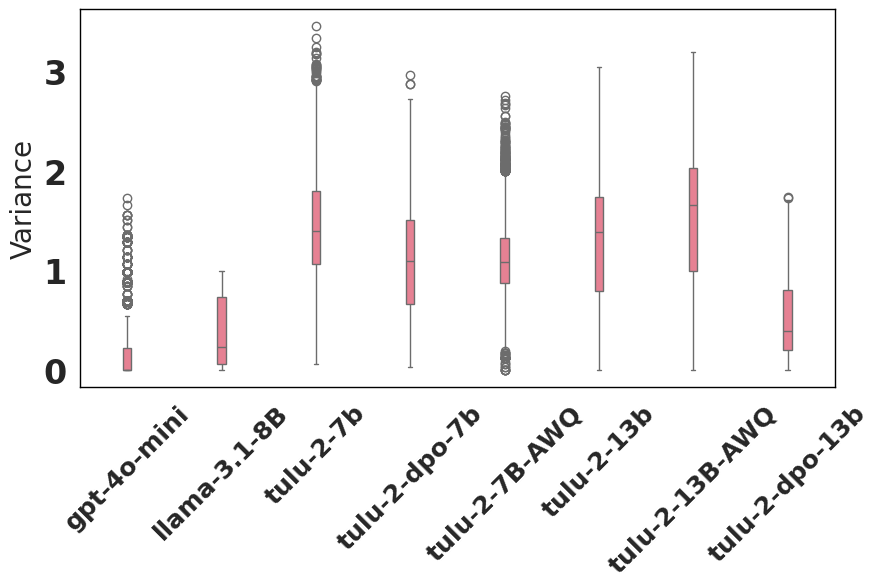

In [5]:
pivot_prompt_df= load_object("dataframes/pivot_prompt_df_without_NA_regular_run.pkl.lzma")


model_order=['gpt-4o-mini-8B',
             'Meta-Llama-3.1-8B-Instruct',
             'tulu-2-7b', 
              'tulu-2-dpo-7b',
              'tulu-2-7B-AWQ', 
              'tulu-2-13b' ,
              'tulu-2-13B-AWQ',
              'tulu-2-dpo-13b',
              ]

unique_datasets = ['iot']

hue_palette = sns.color_palette("husl", len(unique_datasets))
hue_palette_dict = dict(zip(unique_datasets, hue_palette))


fig, axes = plt.subplots(2, 1, figsize=(9, 10),sharex=True, sharey=True)
sns.boxplot(data=pivot_prompt_df, x='model', y='variance', hue='dataset', width=0.09, palette=hue_palette_dict, order=model_order, ax=axes[0])
# Ensure the background is white (no grid, no background color)

axes[0].set_title('')
axes[0].set_xlabel('')
axes[0].legend().set_visible(False)  # Hide the legend for the first subplot
# Set y-axis tick labels to be bold and larger
axes[0].tick_params(axis='y', labelsize=24, length=6)  # Adjust labelsize and tick length as needed
# Remove gridlines
axes[0].grid(False)

axes[0].legend().set_visible(False)  
axes[0].grid(False)


axes[0].set_visible(False)

# Adjust the font properties (e.g., bold) of the y-axis ticks
for label in axes[0].get_yticklabels():
    label.set_fontsize(24)  # Set the size
    label.set_fontweight('bold')  # Set to bold

for label in axes[0].get_xticklabels():
    label.set_fontsize(24)  # Set the size
    label.set_fontweight('bold')  # Set to b
    if label.get_text() == 'gpt-4o-mini-8B':
        label.set_text('gpt-4o-mini')  # Replace the label text
    
# Boxplot for the second dataframe
sns.boxplot(data=pivot_prompt_df, x='model', y='variance', hue='dataset', width=0.09, palette=hue_palette_dict, ax=axes[1])
axes[1].set_title('')
axes[1].set_xlabel('')
axes[1].set_xlabel('')
axes[1].legend().set_visible(False)  # Hide t
# Remove gridlines
axes[1].grid(False)

for label in axes[1].get_yticklabels():
    label.set_fontsize(24)  # Set the size
    label.set_fontweight('bold')  # Set to bold


labels = []

import re
for label in axes[1].get_xticklabels():
    text = label.get_text()
    if text == 'gpt-4o-mini-8B':
        text = 'gpt-4o-mini'    
    elif text == 'gemini-gpt-4o-mini-8B':
        text = 'gpt-4o-mini\n(gemini)'
    elif text == 'Meta-Llama-3.1-8B-Instruct':
        text= 'llama-3.1-8B'
    text = re.sub(r'^gemini-([\w-]+)', r'\1\n(gemini)', text)        
    labels.append(text)

axes[1].set_xticklabels(labels, fontsize=18, fontweight='bold')
       
for spine in axes[1].spines.values():
    spine.set_edgecolor('black')  # Set the edge color of the frame
    spine.set_linewidth(1)  

axes[0].set_ylabel('Variance', fontsize=20 )
axes[1].set_ylabel('Variance', fontsize=20)
axes[0].set_facecolor('white')
axes[1].set_facecolor('white')
# Rotate x-axis labels to 45 degrees
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout to make space for the legend
plt.legend().set_visible(False)

plt.tight_layout()
plt.show()

## Figure 6: Deviation from majority

> Minority responses exhibit high variance among them, and deviate substantially from the majority response.

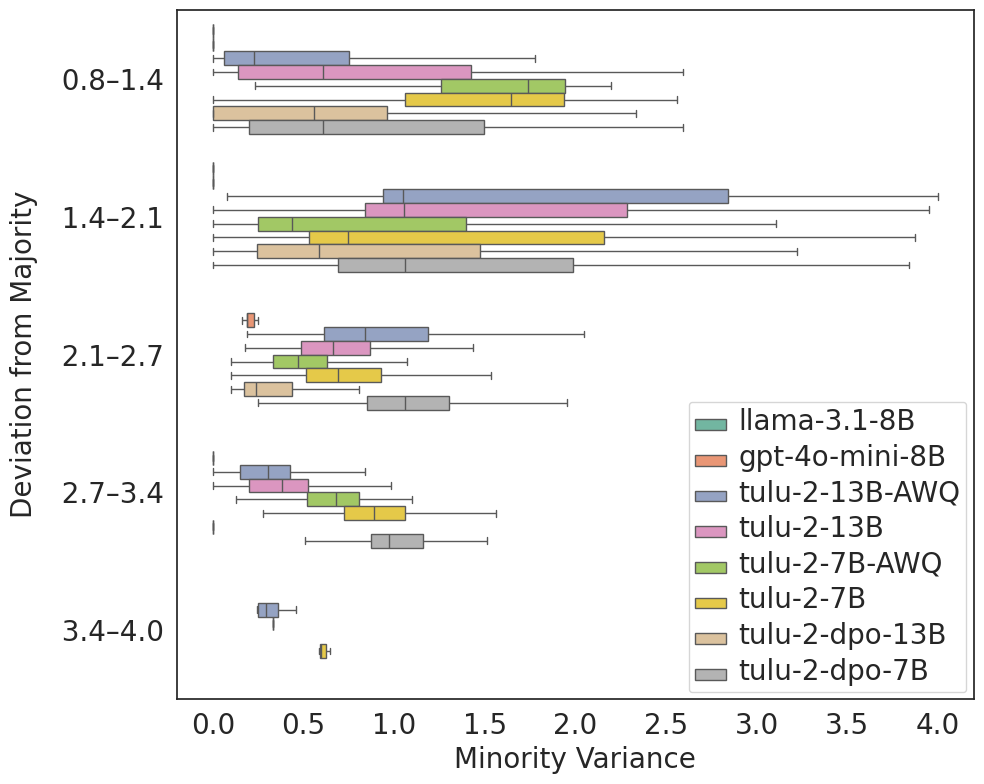

In [6]:
# -----------------------------
# Choose threshold to plot
# -----------------------------
threshold = '25'  # options: 'default', '25', '67', 'common'

# -----------------------------
# Column name selection (robust)
# -----------------------------
if threshold == 'default':
    var_col = 'minority_var'
    dev_col = 'deviation_from_majority'
elif threshold == 'common':
    var_col = 'minority_var_common'
    dev_col = 'deviation_from_majority_common'
else:
    var_col = f'minority_var_{threshold}'
    dev_col = f'deviation_from_majority_{threshold}'

required_cols = ['model', 'dataset', var_col, dev_col]
missing_cols = [c for c in required_cols if c not in pivot_prompt_df.columns]
if missing_cols:
    raise KeyError(f"Missing columns: {missing_cols}")

# -----------------------------
# Prepare and clean data
# -----------------------------
df = pivot_prompt_df[required_cols].copy()
df = df.rename(columns={var_col: 'minority_var', dev_col: 'deviation_from_majority'})

df = df.replace({pd.NA: np.nan})
df = df.dropna(subset=['minority_var', 'deviation_from_majority'])

df['deviation_from_majority'] = pd.to_numeric(df['deviation_from_majority'], errors='coerce')
df['minority_var'] = pd.to_numeric(df['minority_var'], errors='coerce')
df = df.dropna(subset=['minority_var', 'deviation_from_majority'])

# -----------------------------
# Bin the deviation values (start at 0.8)
# -----------------------------
num_bins = 5
min_val = 0.8  # fixed starting point
max_val = np.ceil(df['deviation_from_majority'].max() * 2) / 2  # round up to nearest 0.5

bins = np.linspace(min_val, max_val, num_bins + 1)
bins = np.round(bins, 1)
bin_labels = [f"{bins[i]:.1f}–{bins[i+1]:.1f}" for i in range(len(bins) - 1)]

df['deviation_bin'] = pd.cut(
    df['deviation_from_majority'],
    bins=bins,
    include_lowest=True,
    labels=bin_labels,
    ordered=True
)

df = df.dropna(subset=['deviation_bin'])

# -----------------------------
# Build grouped y-axis (model + bin indentation)
# -----------------------------
models_sorted = sorted(df['model'].unique())
bin_labels_sorted = sorted(bin_labels, key=lambda x: float(x.split('–')[0]))

# construct order list for seaborn (model + bins)
order = []
for model in models_sorted:
    order.append(model)
    order.extend([f"  {b}" for b in bin_labels_sorted])

# assign y-labels: bins indented under model names
df['y_label'] = df.apply(lambda r: f"  {r['deviation_bin']}", axis=1)



# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(10, 8))
sns.set_style("white")  
sns.boxplot(
    data=df,
    y='y_label',
    x='minority_var',
    hue='model',
    dodge=True,
    showfliers=False,
    order=[lbl for lbl in order if lbl in df['y_label'].unique()],
    palette='Set2',
    hue_order=models_sorted  # Ensure legend appears in the same order as the box plots
)
legend = plt.legend(title=None, loc='lower right')
for text in legend.get_texts():
    label = text.get_text()#.lower()  # convert to lowercase
    label = label.replace('Meta-Llama-3.1-8B-Instruct', 'llama-3.1-8B')
    label = label.replace('b', 'B')
    label = label.replace('awq', 'AWQ')
    text.set_fontsize(20)
    text.set_text(label)

#plt.title(f"Minority Variance by Model and Deviation Bin)", fontsize=14)
plt.xlabel("Minority Variance", fontsize=20)
plt.ylabel("Deviation from Majority", fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()


## Figures 7 8, 9, 10,  13, 14, 15

*  Figure 7: Privacy biases for sender “fitness tracker” and
“personal assistant” in gpt-4o-mini (top right triangle) and
llama-3.1-8B (bottom left triangle) 

* Figure 8: Base LLMs with different capacities. 

    * > Each square indicates a privacy bias for a specific information flow. Privacy
        biases can also be identified across a column, row, or
        matrix, by fixing different parameters.We include tulu-2-7B
        (top triangle) and tulu-2-13B (bottom triangle).We omit several
        parameter values for brevity (see Appendix: Figure 15
        for the complete set).
* Figure 9: Base vs. Aligned LLMs: tulu-2-7B (top), tulu-2-13B (right), tulu-2-dpo-7B (down), and tulu-2-dpo-13B (left)        

* Figure 10: Base vs. Quantized LLMs: tulu-2-7B (top), tulu-2-13B (right), tulu-2-7B-AWQ (down), and tulu-2-13B-AWQ (left).

* Figure 13: Remaining set of privacy biases for tulu-2-7B, tulu-2-13B, tulu-2-dpo-7B, and tulu-2-dpo-13B.

* Figure 14: Remaining set of privacy biases for tulu-2-7B, tulu-2-13B, tulu-2-7B-AWQ, and tulu-2-13B-AWQ

* Figure 15: Remaining set of privacy biases for tulu-2-7B and tulu-2-13B



In [7]:
pivot_prompt_df= load_object("dataframes/pivot_prompt_df_without_NA_regular_run.pkl.lzma")

# Define the model-to-options mapping
model_options = {
    ('gpt-4o-mini-8B', 'Meta-Llama-3.1-8B-Instruct'): {
        'tp': [
            'if the information is used to develop new features for the device',
            'if the information is used to perform maintenance on the device',
            'if the information is used to provide a price discount'
        ],
        'attr': [
            'audio of owner',
            "owner's heart rate",
            "owner's location",
            'video of owner'
        ],
        'r': [
            'an Internet service provider',
            'government intelligence agencies',
            'its manufacturer',
            'other devices in the home',
            "owner's doctor",
            "owner's immediate family",
            'the local police'
        ]
    },
    ("tulu-2-7b", "tulu-2-13b"): {
        'tp': [
            'if the information is used to develop new features for the device',
            'if the information is used to perform maintenance on the device',
            'if the information is used to provide a price discount'
        ],
        'attr': [
            'audio of owner',
            "owner's heart rate",
            'the times it is used',
            "owner's location",
            'the times owner is home'
        ],
        'r': [
            'an Internet service provider',
            'government intelligence agencies',
            'its manufacturer',
            'other devices in the home',
            "owner's doctor",
            "owner's immediate family",
            'the local police'
        ]
    },
    ("tulu-2-7b", "tulu-2-13b", "tulu-2-7B-AWQ", "tulu-2-13B-AWQ"): {
        'tp': [
            'if the information is used to develop new features for the device',
            'if the information is used to perform maintenance on the device',
            'the information is not stored'
        ],
        'attr': [
            'audio of owner',
            "owner's heart rate",
            'the times owner is home',
            'video of owner',
            "owner's eating habits"
        ],
        'r': [
            'an Internet service provider',
            'government intelligence agencies',
            'its manufacturer',
            "owner's social media accounts",
            "owner's doctor",
            "owner's immediate family",
            'the local police'
        ]
    },
    ("tulu-2-7b", "tulu-2-13b", "tulu-2-dpo-7b", "tulu-2-dpo-13b"): {
        'tp': [
            'the information is not stored',
            'if the information is kept confidential',
            'in an emergency situation',
            'if the information is anonymous'
        ],
        'attr': [
            'audio of owner',
            "owner's sleeping habits",
            "owner's heart rate",
            'video of owner',
            "owner's exercise routine"
        ],
        'r': [
            'an Internet service provider',
            'government intelligence agencies',
            'its manufacturer',
            'other devices in the home',
            "owner's doctor",
            "owner's immediate family",
            'the local police'
        ]
    }
}

# Create the model selection widget
model_selector = widgets.SelectMultiple(
    options=[
        ('Figure 7', ('gpt-4o-mini-8B', 'Meta-Llama-3.1-8B-Instruct')),
        ('Figure 8', ("tulu-2-7b", "tulu-2-13b")),
        ('Figure 9', ("tulu-2-7b", "tulu-2-13b", "tulu-2-dpo-7b", "tulu-2-dpo-13b")),
        ('Figure 10', ("tulu-2-7b", "tulu-2-13b", "tulu-2-7B-AWQ", "tulu-2-13B-AWQ")),
        ('Figure 13', ("tulu-2-7b", "tulu-2-13b", "tulu-2-dpo-7b", "tulu-2-dpo-13b")),
        ('Figure 14', ("tulu-2-7b", "tulu-2-13b", "tulu-2-7B-AWQ", "tulu-2-13B-AWQ")),
        ('Figure 15', ("tulu-2-7b", "tulu-2-13b"))
        
    ],
    value=[('tulu-2-7b', 'tulu-2-13b')],  # Default selection
    description='Select Models:',
    disabled=False
)

# Display the widget
display(model_selector)

def update_plot(change):
    # Get the selected models (flattening the tuple)
    selected_models = model_selector.value[0]
    
    # Debug: print the selected models to see if they match the expected format
    print(f"Selected models: {selected_models}")
    
    # Check if selected models exist in model_options (convert to tuple if needed)
    selected_tuple = tuple(selected_models)  # Ensure it's a tuple, if it's not already
    if selected_tuple in model_options:
        tp = model_options[selected_tuple]['tp']
        attr = model_options[selected_tuple]['attr']
        r = model_options[selected_tuple]['r']
    else:
        raise ValueError(f"No matching model configuration found for {selected_tuple}.")
    
    # Threahold reponsers
    threshold = 9 if len(selected_models) == 2 else 30

    # Debugging: Check the plot size
    print(f"Threshold i: {threshold}")

    # Assuming `pivot_prompt_df` is defined in your code elsewhere
    fig_df = gen_fig_df(pivot_prompt_df, list(selected_models), threshold, type_of_majority='majority_used_common')

     # Clear the previous output before updating
    clear_output(wait=True)  # This clears the output in the notebook

    if selected_models not in ['Figure 7','Figure 8', 'Figure 9']:
        ci_param_values = None
    else:
        ci_param_values = (s, attr, r, tp)
    # Draw the heatmap
    draw_triangular_heatmap(fig_df, list(selected_models), ci_param_values, dataset='iot', label_font_size=20*len(list(selected_models))//4)

    # Force plot to update, if using matplotlib, call show() to ensure the plot renders
    plt.show()

# Trigger when the model selection changes
model_selector.observe(update_plot, names='value')


Object loaded from dataframes/pivot_prompt_df_without_NA_regular_run.pkl.lzma


SelectMultiple(description='Select Models:', index=(1,), options=(('Figure 7', ('gpt-4o-mini-8B', 'Meta-Llama-…

## Figure 11: Evaluating privacy bias delta (Δ𝑏𝑖𝑎𝑠 ) using ConfAIde. Δ𝑏𝑖𝑎𝑠 varied widely across different LLMs.

Object loaded from dataframes/pivot_prompt_df_confaide.pkl.lzma


<Figure size 4000x2100 with 0 Axes>

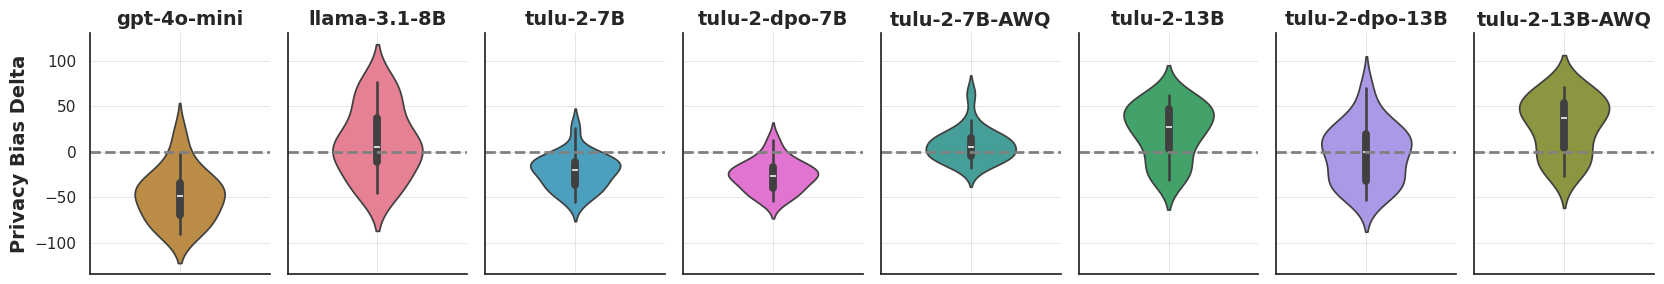

In [8]:
# Define a color palette for the hue categories
pivot_prompt_df_fig11 = load_object('dataframes/pivot_prompt_df_confaide.pkl.lzma')
unique_datasets = pivot_prompt_df_fig11['model'].unique()
hue_palette = sns.color_palette("husl", len(unique_datasets))
hue_palette_dict = dict(zip(unique_datasets, hue_palette))
model_order=[  'gpt-4o-mini-8B',
             'Meta-Llama-3.1-8B-Instruct',
               'tulu-2-7b', 
              'tulu-2-dpo-7b',
              'tulu-2-7B-AWQ', 
              'tulu-2-13b' ,
              'tulu-2-dpo-13b',
              'tulu-2-13B-AWQ'
              
            ]

plt.figure(figsize=(40, 21))
# Assuming you have a 'model' column in your dataframe
# Reshape the data to long-form for FacetGrid, include 'model' and 'bias'


# Create a FacetGrid
g = sns.FacetGrid(pivot_prompt_df_fig11,  col='model',  height=3, aspect=0.7,    col_wrap=8, col_order=model_order)

# Define a function to plot with the hue palette
def color_boxplot(data, **kwargs):
    sns.violinplot(y='bias', data=data, hue='model',  width=0.5, palette=hue_palette_dict, **kwargs)
     

# Map the function to each facet
g.map_dataframe(color_boxplot)

# Set the title and labels for each plot
#g.set_axis_labels('', 'Privacy Bias')

# Remove gridlines and set background to white
#g.set(xticks=[], yticks=[])
#g.set_titles("{col_name}")

# Ensure the background is white (no grid, no background color)
#g.figure.set_facecolor('white')

# Adjusting font size for title, labels, etc. (if needed)
g.set_titles(size=12)      

# Move the x-axis to the bottom for all subplots



# Customizing subplot titles
for ax in g.axes.flat:
    # Modify title text by removing "model="
    title = ax.get_title().replace('model = ', '')
    title = title.replace("| dataset = iot","")
    title = title.replace("| dataset = confaide","")
    ax.set_title(title, fontweight='bold', fontsize=14 )  # Bold subplot titles
    ax.set_ylabel('Privacy Bias Delta', fontsize=14, fontweight='bold')    
    #ax.set_facecolor('white')
      # If the model is 'gpt-4o-mini-8B', replace it with 'gpt-4o-mini'
    if title == 'gpt-4o-mini-8B':
        ax.set_title('gpt-4o-mini', fontweight='bold', fontsize=14)  # Replace the title text

    if title == 'Meta-Llama-3.1-8B-Instruct':
         ax.set_title('llama-3.1-8B', fontweight='bold', fontsize=14)  # Replace the title text

    if title == 'tulu-2-dpo-13b':
        ax.set_title('tulu-2-dpo-13B', fontweight='bold', fontsize=14)  # Replace the title text   

    if title == 'tulu-2-13b':
        ax.set_title('tulu-2-13B', fontweight='bold', fontsize=14)  # Replace the title text                 

    if title == 'tulu-2-dpo-7b':
        ax.set_title('tulu-2-dpo-7B', fontweight='bold', fontsize=14)  # Replace the title text   
        
    if title == 'tulu-2-7b':
        ax.set_title('tulu-2-7B', fontweight='bold', fontsize=14)  # Replace the title text           
        # Add a horizontal line at y=0 for each plot (to indicate 'zero privacy bias')
    ax.axhline(0, color='gray', linestyle='--', linewidth=2)

    # Add gridlines to each subplot
    ax.grid(True, linestyle='-', linewidth=0.5, alpha=0.7)
    

plt.grid(True)

plt.tight_layout()









## Figure 12 and 16

* Figure 12: Remaining set of privacy biases for gpt-4o-mini.
* Figure 16: Set of privacy biases for Llama-3.1-8B-Instruct with simple majority threshold and valid responses threshold of ≥ 9



In [9]:
import textwrap
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import seaborn as sns



# Select the dataset to visualize
fig_df = pivot_prompt_df.copy()

# ---------------------------------------------------------------------
# Heatmap configuration
# ---------------------------------------------------------------------
valid_threshold = 9

# Ensure numeric values in the 'majority' column
fig_df["majority"] = pd.to_numeric(fig_df["majority"], errors="coerce")

# ---------------------------------------------------------------------
# Function to update plot based on selected model
# ---------------------------------------------------------------------
def update_plot(change):
    model = change.new  # Get the new selected model value
    print(f"Selected model: {model}")
    # Filter data for the heatmap
    filtered_df = fig_df.query(
        "model == @model and num_responses >= @valid_threshold"
    )
    
    # Debugging: Check if the filtered DataFrame has data
    if filtered_df.empty:
        print(f"No data found for model: {model} with num_responses >= {valid_threshold}")
        return

    # Create figure
    fig, ax = plt.subplots(figsize=(35, 50))

    # Draw the heatmap
  
    heatmap_draw(
            filtered_df,
            value="majority",
            ax=ax,
            fsize=18,
            pad=0.06
        )
    
    clear_output(wait=True)  # This clears the output in the notebook
    # Remove axis labels added by seaborn/matplotlib defaults
    ax.set_xlabel("")
    ax.set_ylabel("")

    # Remove colorbar if present (heatmap_draw creates one)
    if ax.collections and hasattr(ax.collections[0], "colorbar"):
        colorbar = ax.collections[0].colorbar
        if colorbar is not None:
            colorbar.remove()

    plt.tight_layout(pad=1)
    plt.show()

# ---------------------------------------------------------------------
# Widget for model selection
# ---------------------------------------------------------------------
empty_option = [("", "Select Model")]  # Tuple with empty string and label
model_options = empty_option + [(model, model) for model in pivot_prompt_df['model'].unique()]

model_selector = widgets.Dropdown(
    options=model_options,
    description='Model:',
    disabled=False
)

# Trigger when the model selection changes
model_selector.observe(update_plot, names='value')

# Display the widget
display(model_selector)


Dropdown(description='Model:', options=(('', 'Select Model'), ('Meta-Llama-3.1-8B-Instruct', 'Meta-Llama-3.1-8…